# Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
pip install --upgrade xlrd

## Importing the dataset

In [2]:
data = pd.read_excel('Combined_Bergman.xls')
data.pop('Director')
data.pop('Year') # Does not serve as an input variale to the classification models
data.pop('COUNTRY') # Does not serve as an input variale to the classification models

X = data.iloc[: , 1:-1].values # These are the predictor, independent variables (the 1:-1 excludes the first and last columns)
y = data.iloc[: , -1].values # These are the target variables (or classes, in this case)
data.head()

,Film,Pan,Tilt,Pan w. Tilt,Track,Track w. Pan & tilt,Crane,Zoom,Zoom w. Pan & Tilt,Total,...,POV,INS,BCU,CU,MCU,MS,MLS,LS,VLS,BERGMAN
0,10 Things I Hate About You,12,3,6,20,32,18,10,1,102,...,4.0,2.0,64,224,82,37,36,53,3,0
1,"Almost Perfect Affair, An",22,3,14,6,11,1,2,1,60,...,12.0,7.0,70,199,93,51,26,51,9,0
2,"Amityville Horror, The",23,13,29,10,18,1,18,4,116,...,7.0,18.0,138,141,50,34,41,90,6,0
3,Angela's Ashes,21,3,14,9,4,1,0,1,53,...,4.0,10.0,52,152,72,60,68,88,4,0
4,Another Thin Man,41,6,6,15,52,2,0,0,122,...,7.0,4.0,20,137,99,93,84,64,3,0


In [3]:
data.head()

,Film,Pan,Tilt,Pan w. Tilt,Track,Track w. Pan & tilt,Crane,Zoom,Zoom w. Pan & Tilt,Total,...,POV,INS,BCU,CU,MCU,MS,MLS,LS,VLS,BERGMAN
0,10 Things I Hate About You,12,3,6,20,32,18,10,1,102,...,4.0,2.0,64,224,82,37,36,53,3,0
1,"Almost Perfect Affair, An",22,3,14,6,11,1,2,1,60,...,12.0,7.0,70,199,93,51,26,51,9,0
2,"Amityville Horror, The",23,13,29,10,18,1,18,4,116,...,7.0,18.0,138,141,50,34,41,90,6,0
3,Angela's Ashes,21,3,14,9,4,1,0,1,53,...,4.0,10.0,52,152,72,60,68,88,4,0
4,Another Thin Man,41,6,6,15,52,2,0,0,122,...,7.0,4.0,20,137,99,93,84,64,3,0


## Variable importance

In [9]:
# data = data.drop(['ASL', 'RA', 'POV', 'INS'], axis = 1)
data = data.drop(['ASL', 'RA', 'POV', 'INS', 'Pan', 'Tilt', 'Pan w. Tilt', 'Track', 'Track w. Pan & tilt', 'Crane', 'Zoom', 'Zoom w. Pan & Tilt', 'Total'], axis = 1)

data.head()

,Film,BCU,CU,MCU,MS,MLS,LS,VLS,BERGMAN
0,10 Things I Hate About You,64,224,82,37,36,53,3,0
1,"Almost Perfect Affair, An",70,199,93,51,26,51,9,0
2,"Amityville Horror, The",138,141,50,34,41,90,6,0
3,Angela's Ashes,52,152,72,60,68,88,4,0
4,Another Thin Man,20,137,99,93,84,64,3,0


In [10]:
# Correlation
abs(data.corr()["BERGMAN"])
# You usually want to keep everything that has a high correlation

BCU        0.405429
CU         0.038235
MCU        0.068768
MS         0.175748
MLS        0.473851
LS         0.131860
VLS        0.086551
BERGMAN    1.000000
Name: BERGMAN, dtype: float64

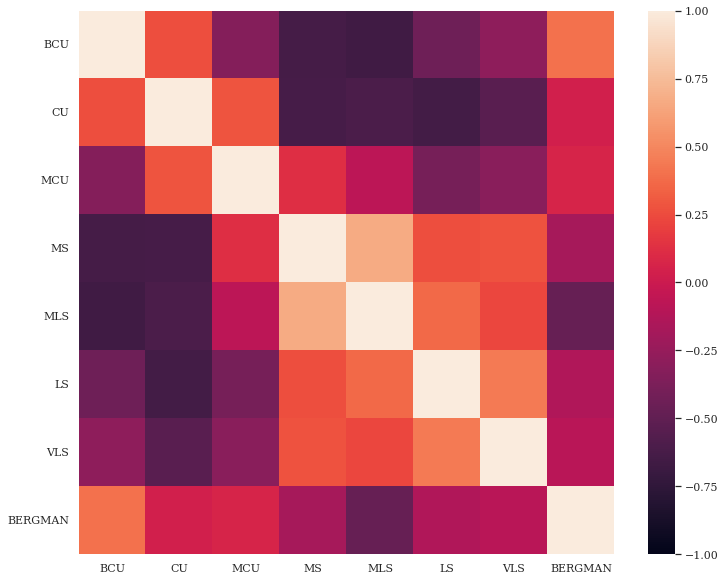

In [11]:
# Correlation Heatmap
import seaborn as sn

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 16})

fig_dims = (12, 10)
fig, ax = plt.subplots(figsize = fig_dims)
sn.heatmap(data.corr(), ax=ax, vmin=-1, vmax=1)
plt.yticks(rotation = 0)
plt.show()

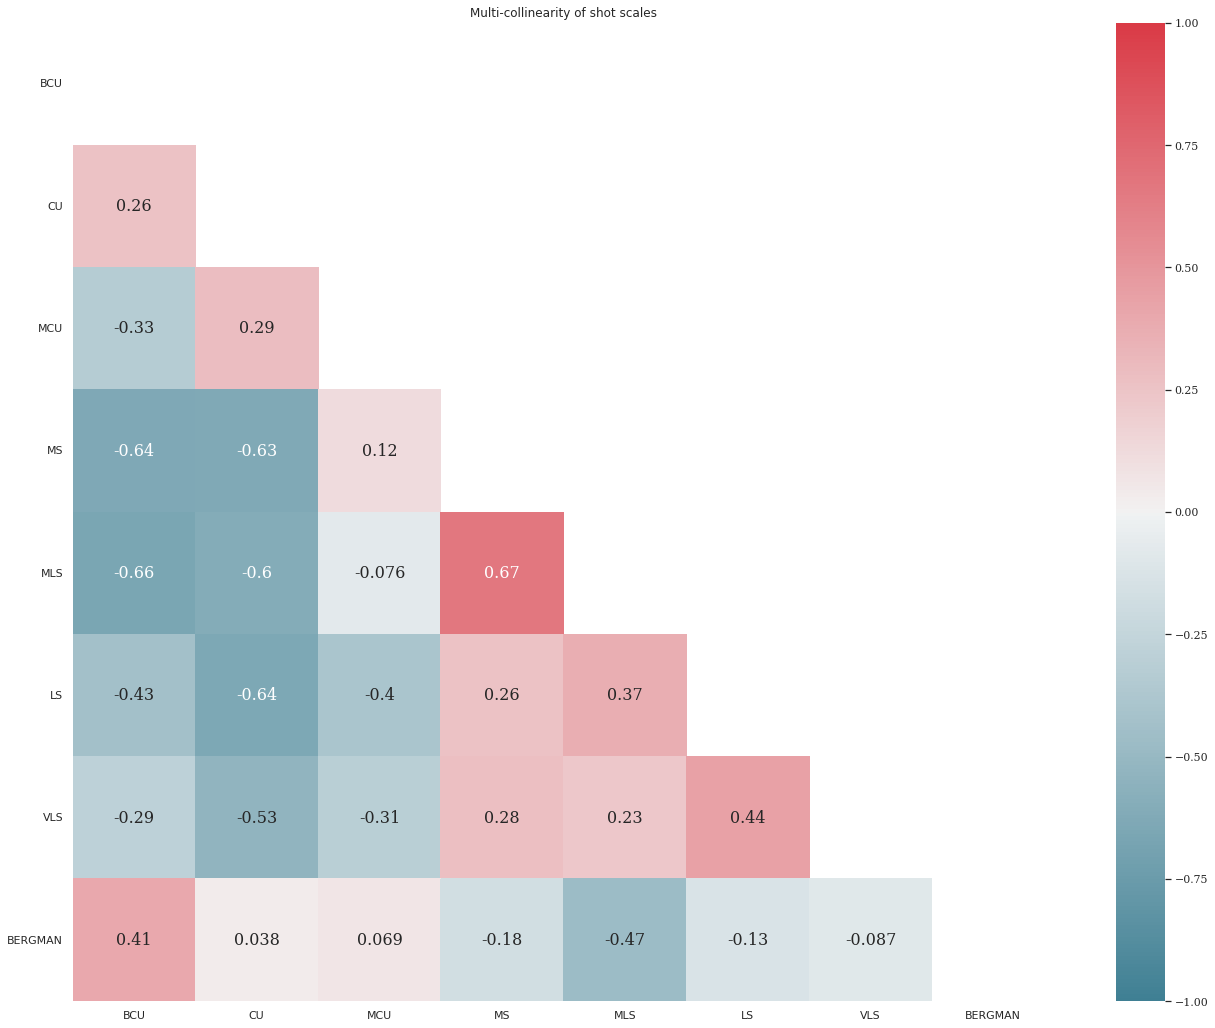

In [12]:
sn.set(style="white")

# Create a covariance matrix
corr = data.corr()

# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22,18))
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 16})

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr,mask=mask,cmap=cmap,vmin=-1,vmax=1,center=0, annot=True)
ax.set_title('Multi-collinearity of shot scales')
plt.yticks(rotation = 0)
plt.savefig('correlationShotScalesAlt.png')